# Advanced Plotting

by Henry Ngo (2018)

The `results.py` module contains several plotting functions to visualize the results of your `orbitize!` orbit fit. Basic use of these functions are covered in the OFTI and MCMC tutorials. Here, we will examine these plotting functions more deeply. This tutorial will be updated as more features are added to `orbitize!`.

## 1. Test orbit generation with OFTI

In order to have sample data for this tutorial, we will use OFTI to generate some orbits for a published dataset on the GJ 504 system. The following code block is from the OFTI_tutorial ipython notebook, with 10000 orbits generated. Please see that tutorial for details.

**Note: If you have already run this tutorial and saved the computed orbits, you may skip to Section 3 and load up your previously computed orbits instead of running this block below**

In [1]:
import orbitize.driver
myDriver = orbitize.driver.Driver(
    '../../tests/GJ504.csv', # relative or absolute path to data file
    'OFTI', # name of algorithm for orbit-fitting
    1, # number of secondary bodies in system
    1.22, # total system mass [M_sun]
    56.95, # parallax of system [mas]
    mass_err=0.08, # mass error [M_sun]
    plx_err=0.26 # parallax error [mas]
)
s = myDriver.sampler
orbits = s.run_sampler(10000)

## 2. Creating a Results object with computed orbits

After computing your orbits from either OFTI or MCMC, we store them in a Results object for further analysis and plotting.

In [2]:
import orbitize.results
myResults = orbitize.results.Results(
    sampler_name = 'OFTI', # name of sampler to be stored in results object
    post = orbits # array of MxN array of orbital parameters (M orbits with N parameters per orbit)
)

It is also useful to save this Results object to a file if we want to load up the same data later without re-computing the orbits

In [3]:
myResults.save_results('plotting_tutorial_GJ504_results.hdf5')

For more information on the Results object, see below.

In [ ]:
myResults?

Note that you can also add more computed orbits to a results object with `myResults.add_samples()`

In [ ]:
myResults.add_samples?

## 3. (Optional) Load up saved results object

If you are skipping the generation of all orbits because you would rather load from a file that saved the Results object generated above, then execute this block to load it up. Otherwise, skip this block (however, nothing bad will happen if you run it even if you generated orbits above).

In [14]:
del myResults # delete existing Results object 
myResults = orbitize.results.Results() # create empty Results object
myResults.load_results('plotting_tutorial_GJ504_results.hdf5') # load from file

## 4. Using our Results object to make plots

There are currently two plotting functions available: `plot_corner()` makes a corner plot and `plot_orbits()` displays some or all of the computed orbits. Both plotting functions return matplotlib.pyplot.figure objects, which can be displayed, further manipulated with matplotlib.pyplot functions, and saved.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

### 4.1 Corner plots

This function is a wrapper for `corner.py` and creates a display of the 2-D covariances between each pair of parameters as well as histograms for each parameter. These plots are known as "corner plots", "pairs plots", "scatterplot matrix" as well as other names.

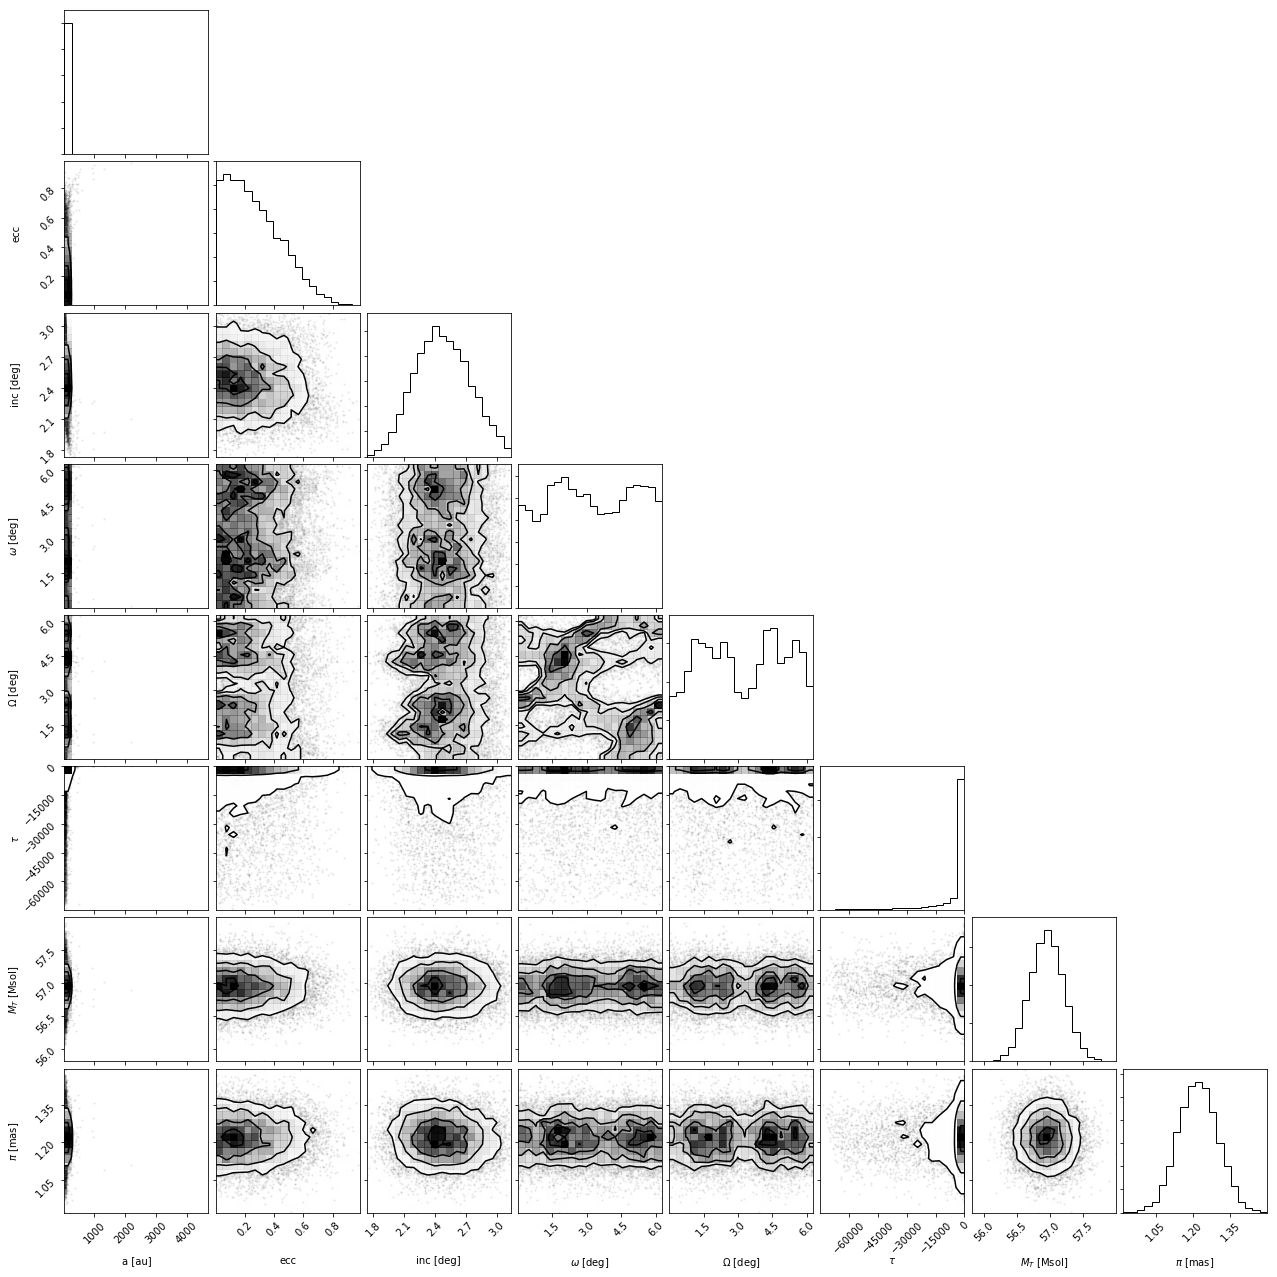

In [16]:
corner_figure = myResults.plot_corner()

This giant plot is pretty hard to read. For example, the first column, semimajor axis, is not very well displayed. 

** (To be completed) **

### 4.2 Orbit Plot

In [ ]:
orbit_figure = myResults.plot_orbits()